# 1. Basic Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('train.xlsx')
train.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37334,36,blue-collar,single,primary,no,1959,yes,no,cellular,13,may,1966,1,-1,0,unknown,no
2356,24,technician,single,secondary,no,-126,yes,yes,unknown,13,may,382,2,-1,0,unknown,no
1348,34,services,married,secondary,no,142,yes,no,unknown,8,may,159,4,-1,0,unknown,no
2236,45,management,single,tertiary,no,0,no,no,unknown,12,may,55,2,-1,0,unknown,no
14574,42,management,married,tertiary,no,843,no,yes,cellular,15,jul,226,3,-1,0,unknown,no
34650,46,management,married,tertiary,no,1217,yes,no,cellular,5,may,83,9,168,2,other,no
23722,31,management,single,tertiary,no,0,no,no,cellular,28,aug,35,31,-1,0,unknown,no
25112,34,management,married,tertiary,no,63,no,no,cellular,18,nov,83,1,102,2,failure,no
37066,50,management,married,tertiary,no,2809,yes,no,cellular,13,may,200,2,259,9,failure,no
31095,60,housemaid,divorced,secondary,no,2063,no,no,cellular,17,feb,73,2,-1,0,unknown,no


# 2. Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#No null value is visible

In [29]:
#Lets try to differentiate the categorical and numerical columns

all_cols = train.columns
num_cols = list(train._get_numeric_data().columns)
# cat_cols = list(set(all_cols) - set(num_cols))
# print(num_cols)
# print(cat_cols)
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


*Observations*

- Majority of the numeric variable seem to be highly skewed

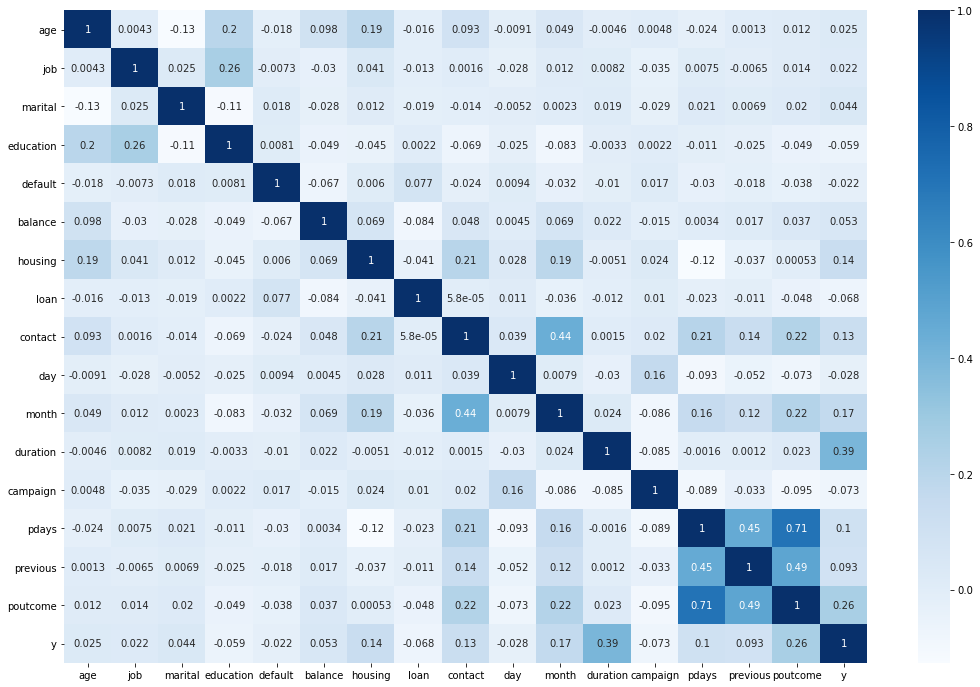

In [22]:
#Checking correlation between features

df_corr = train.copy()

for col in list(df_corr.columns):
    if df_corr[col].dtype == 'object':
        df_corr[col] = pd.factorize(df_corr[col])[0]

corr = df_corr.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

*Observations*

- Duration, poutcome and y has a reasoble relation.
- poutcome and pdays are highly correlated. (0.71)
- pdays vs previous: 0.45
- previous vs poutcome: 0.49
- month vs contact: 0.44

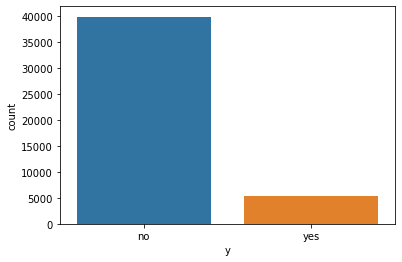

In [23]:
#Lets check the distribution of y

sns.countplot(x='y', data=train);

The dataset is imbalanced

In [28]:
# def dist_plot(X, label=y, columns):
#     new_X = X.copy()
    
#     for idx, col in enumerate(columns):
#         plt.subplot(3, 4, idx+1)
        
#         Q1 = np.percentile(new_x[col], 25.)
#         Q2 = np.peecentile(new_x[col], 50.)
#         Q3 = np.peecentile(new_x[col], 75.)
        
#         IQR = (Q3 - Q1)
#         upper, lower = (Q3 + 1.5*IQR), (Q1 - 1.5*IQR)
        
#         new_X.loc[new_X[col] > upper, col] = upper
#         new_X.loc[new_X[col] < lower, col] = upper

***Analyzing numeric features***

In [46]:
def dist_plot(X, columns, label=None, kind='boxplot', basis=None):
    dt = X.copy()
    plt.figure(figsize=(16, 12))
    for idx, col in enumerate(columns):
        plt.subplot(3, 4, idx+1)
        
        if (kind == 'boxplot'):
            g = sns.boxplot(x = col, y=label, data=dt)
            
        elif (kind == 'histplot'):
            g = sns.histplot(x=col, data=dt, hue=basis, kde=True)
            
    plt.tight_layout()

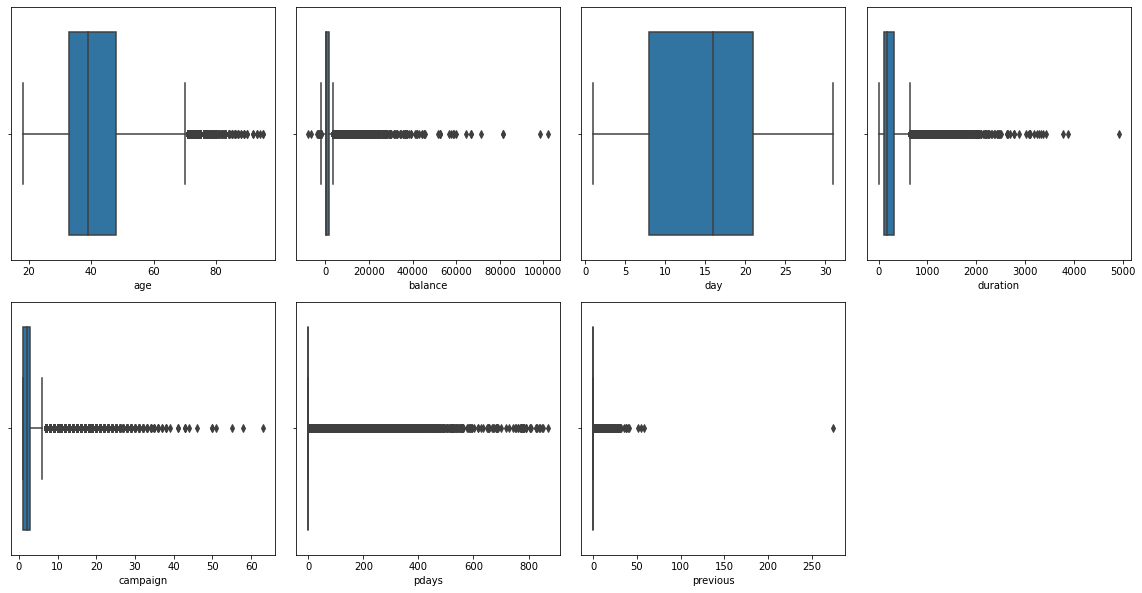

In [47]:
dist_plot(train, num_cols)

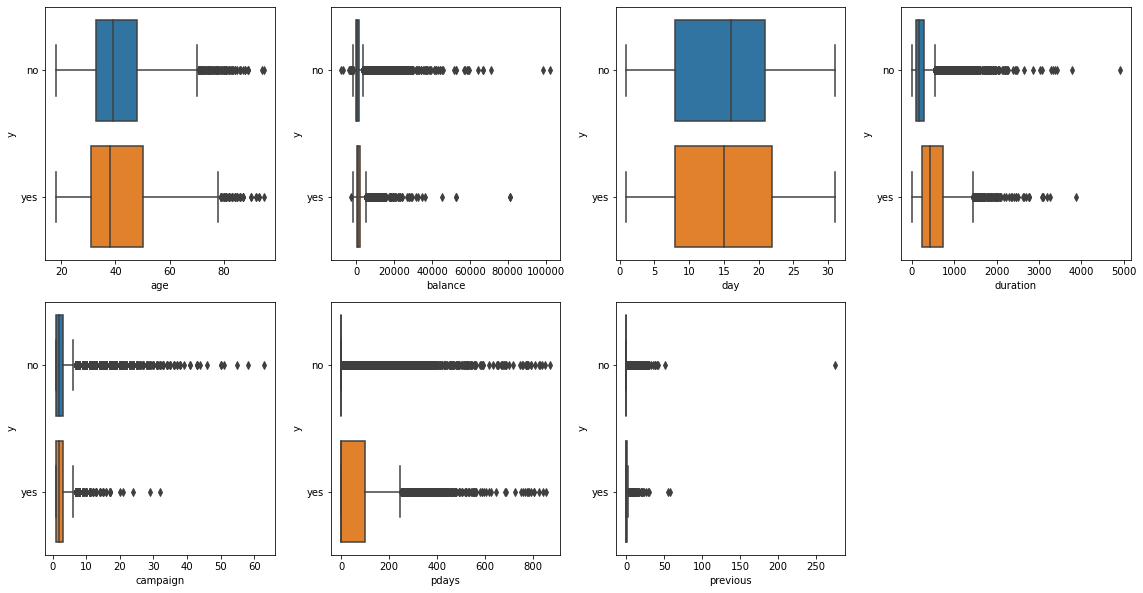

In [48]:
dist_plot(train, num_cols, label='y')

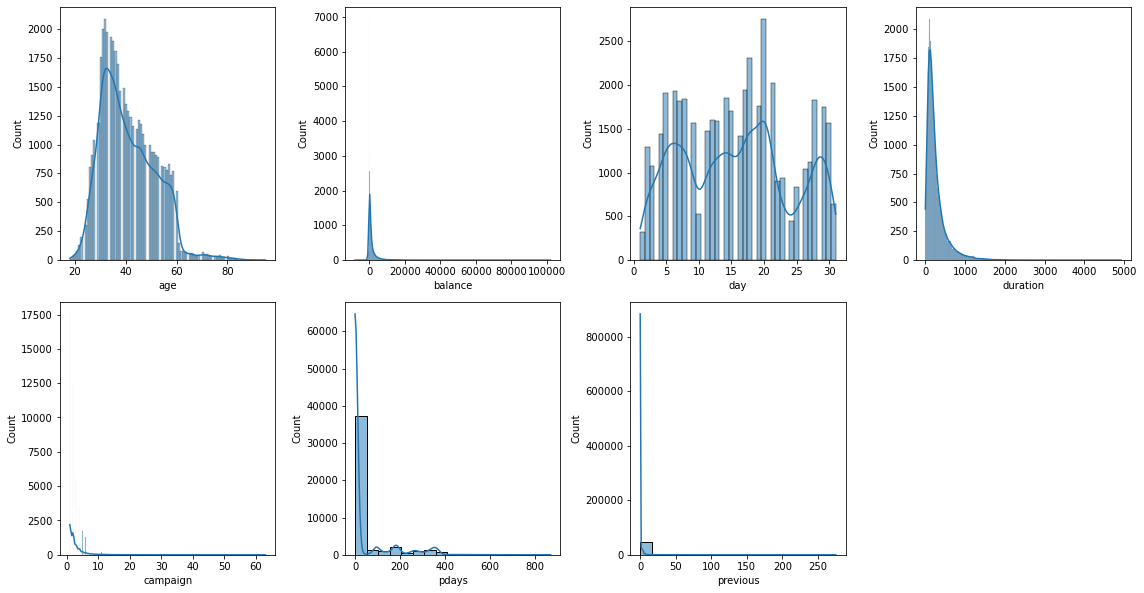

In [49]:
dist_plot(train, num_cols, kind='histplot')

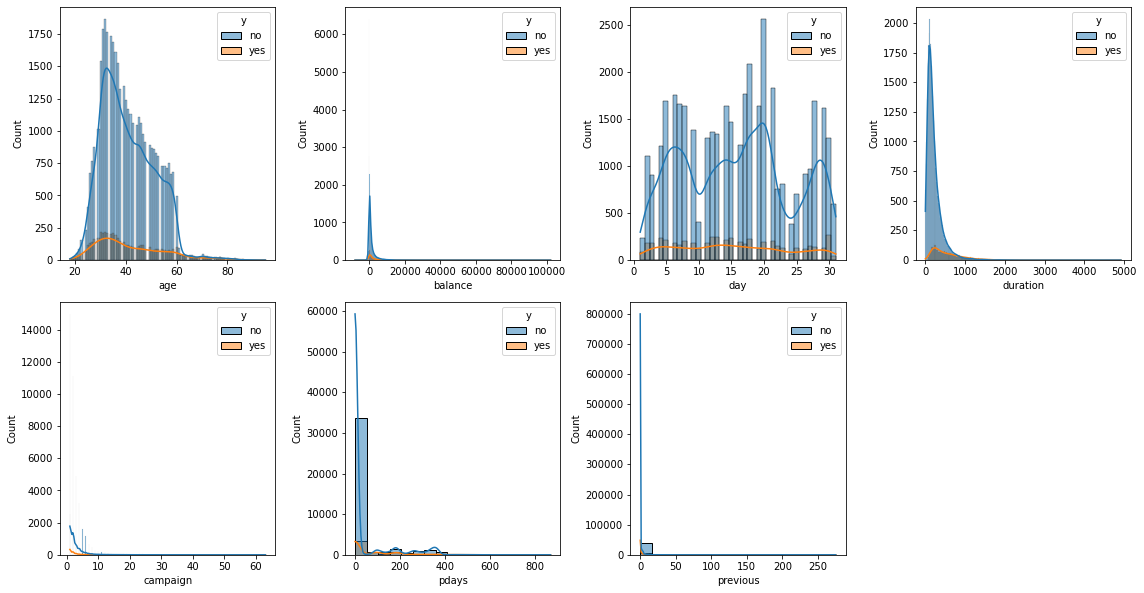

In [50]:
dist_plot(train, num_cols, kind='histplot', basis='y')

*Observations*

- Campaign, pdays and previous: Require more analysis
- Balance is highly skewed
- Similarly duration has a peak then a huge tail.

In [53]:
train['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
37        2
50        2
41        2
51        1
58        1
39        1
55        1
44        1
46        1
63        1
Name: campaign, dtype: int64